# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студенка гр. 0382 Здобнова Ксения. Вариант №32 (четный).

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения

**Сеть аффилированности** - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии. Сеть состоит из двух измерений.

**n-клика** - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n.

**n-клан** - n-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает n для путей внутри подграфа.

**k-ядро** - максимальный подграф, в котором каждая вершина связана минимум с _k_ другими вершинами этого же подграфа.

**n-клуб** - максимальный подграф диаметра меньше либо равно n.

**k-плекс** - максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен с не менее чем с $g_s - k$ узлами подграфа.

**Полупуть от узла _i_ до узла _j_** - последовательность различных узлов, где все последовательные пары узлов соединены дугой от первого ко второму или наоборот.

**Модулярность** - характеристика структуры сети, в частности степень кластеризации узлов, когда внутри кластера наблюдается много узлов, а между кластерами мало узлов. показатель модулярности определяется как разница между долей связей внутри группы и ожидаемой доли связей, если бы связи были размещены случайно.

**Гиперграф** - обобщение понятия графа: гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причем ни одно подмножество не является пустым.

* $ {H = H(A, B)}$, где ${A} = \{a_1, ..., a_n\}$ - множество объектов; 
* ${B} = \{b_1, ..., b_n\} - множество ребер$

**Двойственный гипеграф** для гипперграфа $ {H = H(A, B)}$:

* $ {H* = H(B, A)}$, где ${A} = \{a_1, ..., a_n\}$ - множество ребер; 
* ${B} = \{b_1, ..., b_n\} - множество объектов$

**Матрица соучастия акторов**:

* $X^{{N}} = \{x_{ij}^{{N}} \}$

* $x_{ij}^{{N}} = \sum_{k = 1}^{h} a_{ik}a_{jk}$

**Матрица перекрытия событий**:

* $X^{{M}} = \{x_{kl}^{{M}} \}$

* $x_{kl}^{{M}} = \sum_{i = 1}^{g} a_{ik}a_{jl}$

**Степень участия** - количество событий, с которым связан каждый актор.

* $a_{i+} = \sum_{j = 1}^{h} a_{ij} = x_{ii}^{{N}}$

**Размер событий:**

* $a_{+j} = \sum_{i = 1}^{g} a_{ij} = x_{ii}^{{M}}$

**Средний размер событий** - среднее количество акторов в каждом событии или средняя степень узлов, прндставляющих события в двудольном графе.

* $\overline {a}_{ij} = \frac{1}{h} \sum_{j = 1}^{h} x_{jj}^{{M}}$

**Связная сеть аффилированности** - сеть, в которой все пары узлов достижимы.

**Диаметр аффилированной сети** -длина самого длинного пути между любой парой акторов и/или событий.

**Клика уровня с в взвешенном графе** - максимальный полный подграф из трех или более узлов, все из которых являются смежными на уровне _c_, то есть между всеми парами узлов есть ребра со значениями, большими или равными _c_.

**Клика уровня с для отношения соучастия** - подграф, в котором все пары акторов совместно участвуют не менее чем в _c_ событиях.

**Клика уровня с для отношения перекрытия** - подграф, в котором все пары событий имеют не менее _с_ общих членов.

**Свойства сетей аффилированности:**

* Количество перекрывающихся связей между событиями частично зависит от количества событий, к которым принадлежат акторы.

* Количество связей соучастия между акторами частично зависит от размера событий.

* Актор, принадлежащий $a_{i+}$ событиям, создает $C_{a_{i+}}^2$ парных связей между событиями.

* Событие с участиеми $a_{+j}$ участников создает $C_{a_{+о}}^2$ связей между парами акторов.

* Плотность для дихотомического отношения - доля присутствующих связей.

* Плоность для ценностных отношений - среднее значение связей.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Язык программирования – R.

Перед выполнением практическиз задач, были загружены необходимые библиотеки и пакеты:

In [ ]:
install.packages("network")
install.packages("igraph")
install.packages("statnet")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. Из файла florentine_marital.csv (для чётных вариантов) была извлечена социоматрица с помощью соответствующей функции read.csv(). Полученная социоматрица была отображена с помощью алгоритма укладки Фрюхтермана-Рейнгольда.

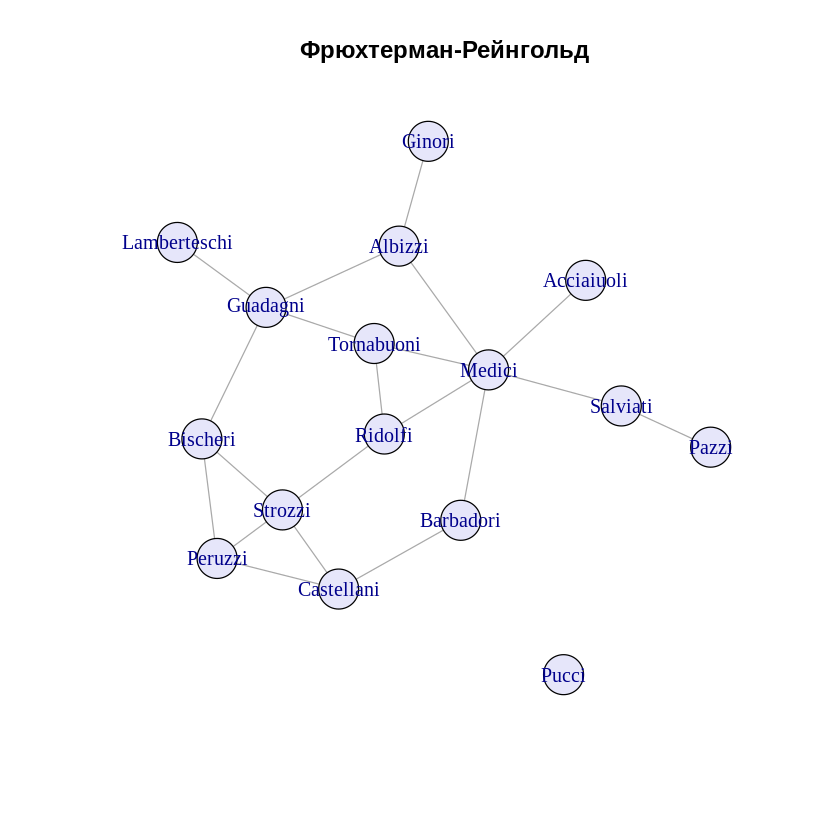

In [ ]:
data <- read.csv("florentine_marital.csv", header = TRUE)
data <- as.matrix(data)
marital_graph <- graph.adjacency(data, mode="undirected")
V(marital_graph)$color <- "lavender"
plot(marital_graph, layout = layout_with_fr, label = colnames(data), main = "Фрюхтерман-Рейнгольд")

2. Данная сеть была исследована на предмет подгрупп с помощь:


*   𝑛-клик;
*   𝑛-кланов;
*   𝑛-клубов; 
*   𝑘-ядер;
*   𝑘-плексов.

Были указаны полученные подгруппы. Сделано выводы.

Были исключены одиночные вершины для использования функций.

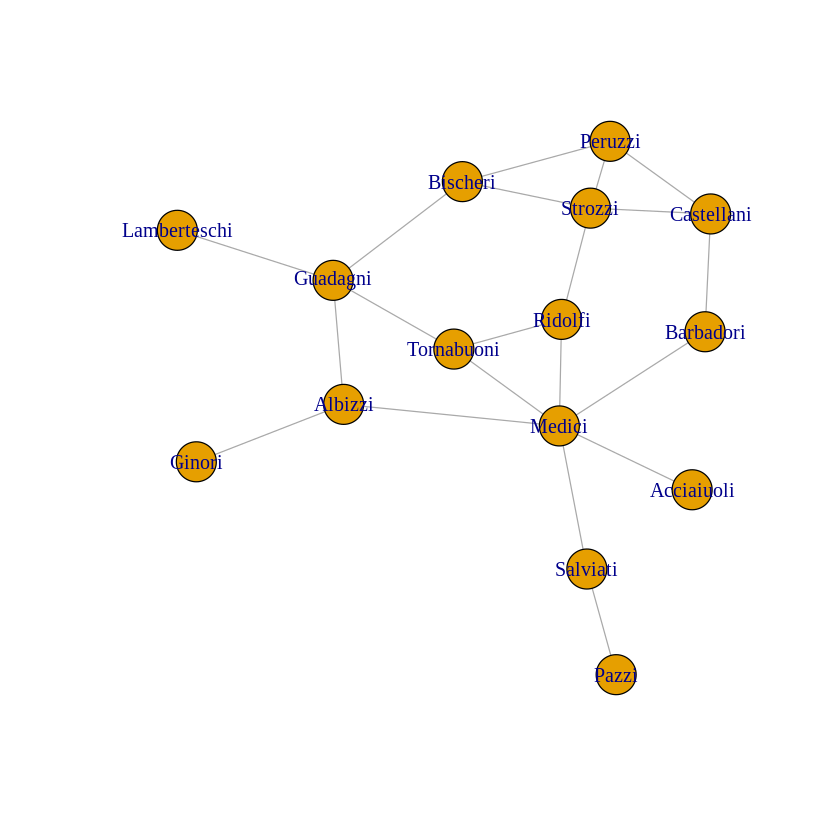

In [ ]:
data <- data[!(apply(data, 1, function(x) all(x == 0))),!(apply(data, 1, function(x) all(x == 0)))]
graph2 <- graph.adjacency(data,  mode="undirected")
plot(graph2, layout=layout_with_fr, label=colnames(data))

3. С помощью библиотеки igraph были исследованы алгоритмы обноружения сообществ в зависимости от номера варианта:

(2) Spinglass, Walktrap, Label propagation; 

Был кратко объяснена суть каждого алгоритма. Выведено значение модулярности и отображены полученные сообщества. Сделаны выводы.


[1] 0.3975

$`1`
[1] "Pazzi"    "Salviati"

$`2`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`3`
[1] "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Acciaiuoli" "Barbadori"  "Medici"     "Ridolfi"    "Tornabuoni"

[1] 0.3975

$`1`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`2`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"

[1] 0.34

$`1`
[1] "Acciaiuoli" "Barbadori"  "Medici"    

$`2`
[1] "Albizzi" "Ginori" 

$`3`
[1] "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Guadagni"     "Lamberteschi"

$`5`
[1] "Pazzi"    "Salviati"

$`6`
[1] "Pucci"

$`7`
[1] "Ridolfi"    "Tornabuoni"

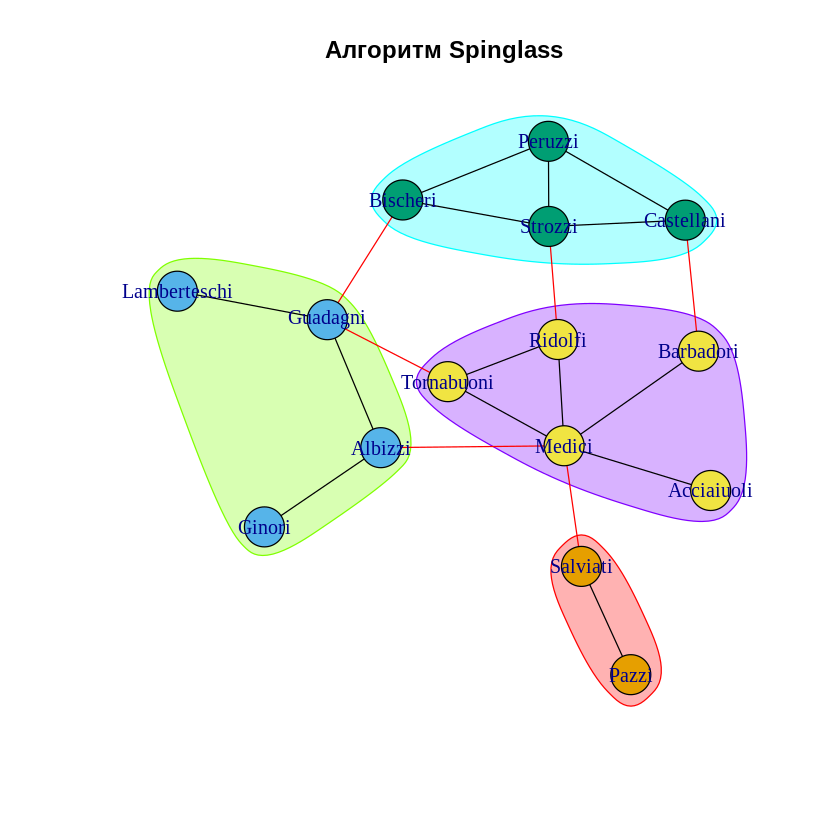

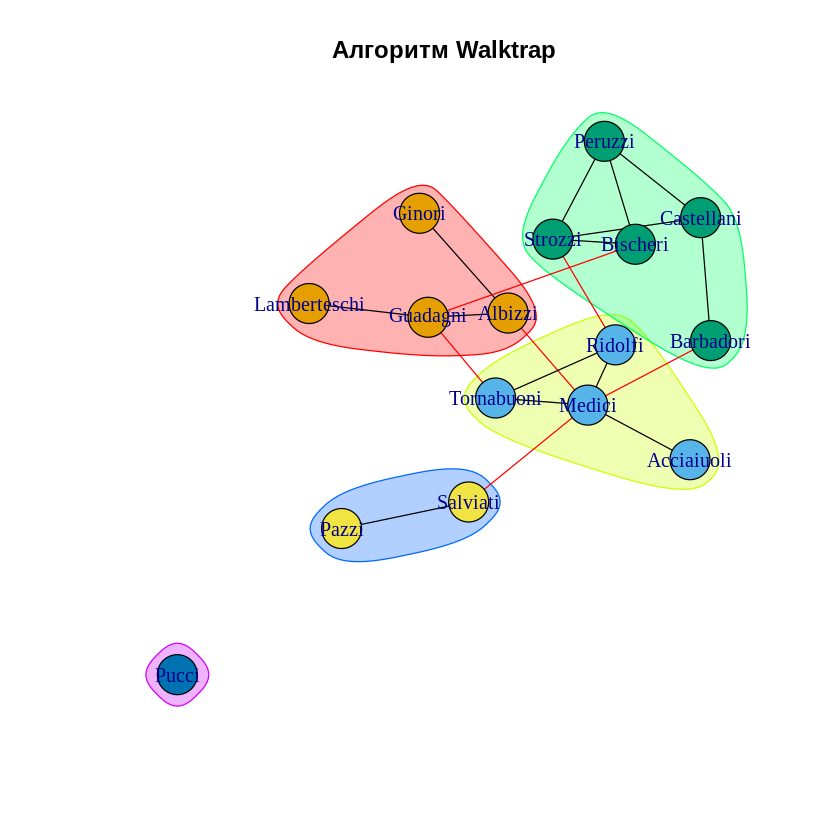

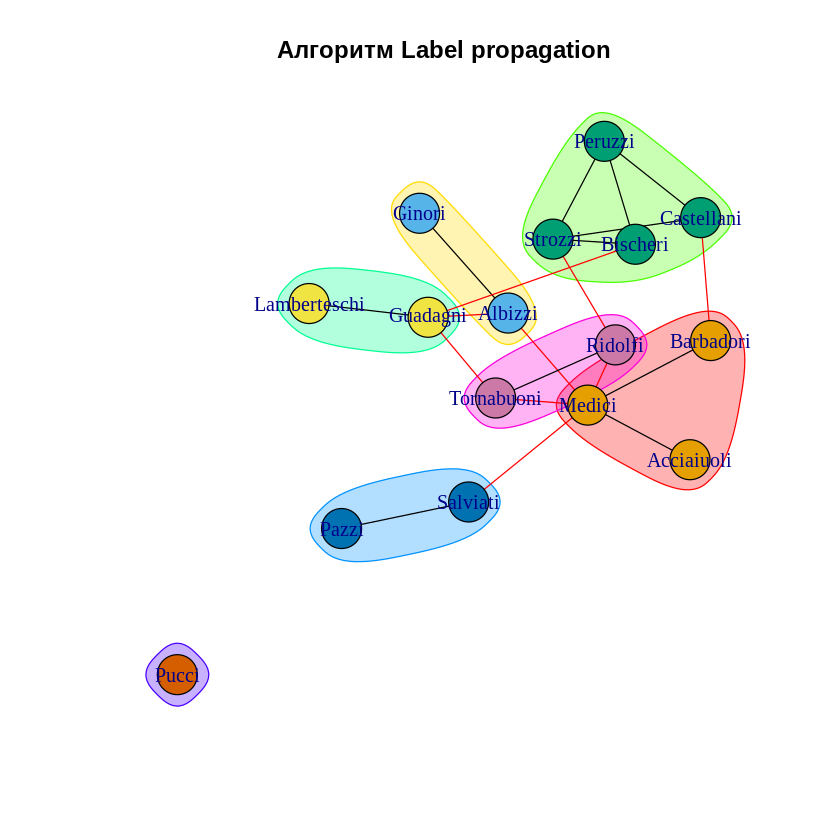

In [58]:
spinglass <- cluster_spinglass(graph2)
modularity(spinglass)
communities(spinglass)

walktrap <- cluster_walktrap(marital_graph)
modularity(walktrap)
communities(walktrap)

labelprop <- cluster_label_prop(marital_graph)
modularity(labelprop)
communities(labelprop)

plot(spinglass, graph2, layout=layout_with_kk(graph2), main="Алгоритм Spinglass")
plot(walktrap, marital_graph, layout=layout_with_kk(marital_graph), main="Алгоритм Walktrap")
plot(labelprop, marital_graph, layout=layout_with_kk(marital_graph), main="Алгоритм Label propagation")

**Алгоритм Spinglass:**

Данный алгоритм использует модель спинового стекла и имитации отжига (spinglass model and simulated annealing). В основе подхода лежит идея выделения сообществ в сети как «нахождения основного состояния спинового стекла бесконечного диапазона». Данный метод предполагает задание количество вращений (spins), которое представляет собой максимальное количество сообществ, которые предполагает получить исследователь. Он может работать с направленными графами, но направление игнорируется при его реализации, может учитывать взвешенные графы.

**Алгоритм Walktrap:**

Данный алгоритм основан на идее, что случайные блуждания оказываются «пойманы» в той части графа, внутри которого связи плотнее, чем окружающие, то есть там, где находится сообщество.  рассчитывают расстояние между вершинами или между группами вершин, которое в свою очередь зависит от вероятности достижения от одной вершины до другой в процессе случайного блуждания. Данный показатель оказывается большим, если вершины находятся в разных сообществах в графе, и маленьким, если они находятся в одном сообществе. После того, как вершина присоединена к какому-либо сообществу, расстояния между вершинами и сообществами пересчитываются.  

**Алгоритм Label propagation:**

Он основан на идее распространения ярлыков (которое напоминает процесс распространения инфекции). Процедура «распространения ярлыков» состоит в том, что первоначально каждая вершина сети имеет свой собственный ярлык, затем начинается итеративный процесс и на каждой итерации часть вершин принимает ярлыки своих «соседей», а именно тот ярлык, который более представлен среди соседей данной вершины. Процесс продолжается до тех пор, пока итерации не прекратятся. Когда они прекращаются, можно делать вывод относительно структуры сообществ данной сети. Критерием для остановки итераций является условие, чтобы «каждая вершина имела по меньшей мере столько же соседей внутри своего сообщества, сколько она имеет соседей из других сообществ» 

Можно сделать вывод, что все семьи кроме Pucci имеют сообщества.

4. Из файла ceo.csv была извлена матрица инцидентности с помощью соответствующих функций. Полученная матрица была отражена.

In [51]:
data <- data.matrix(read.csv('ceo.csv', header = FALSE))
data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


5. Сеть была отображена в виде биграфа.

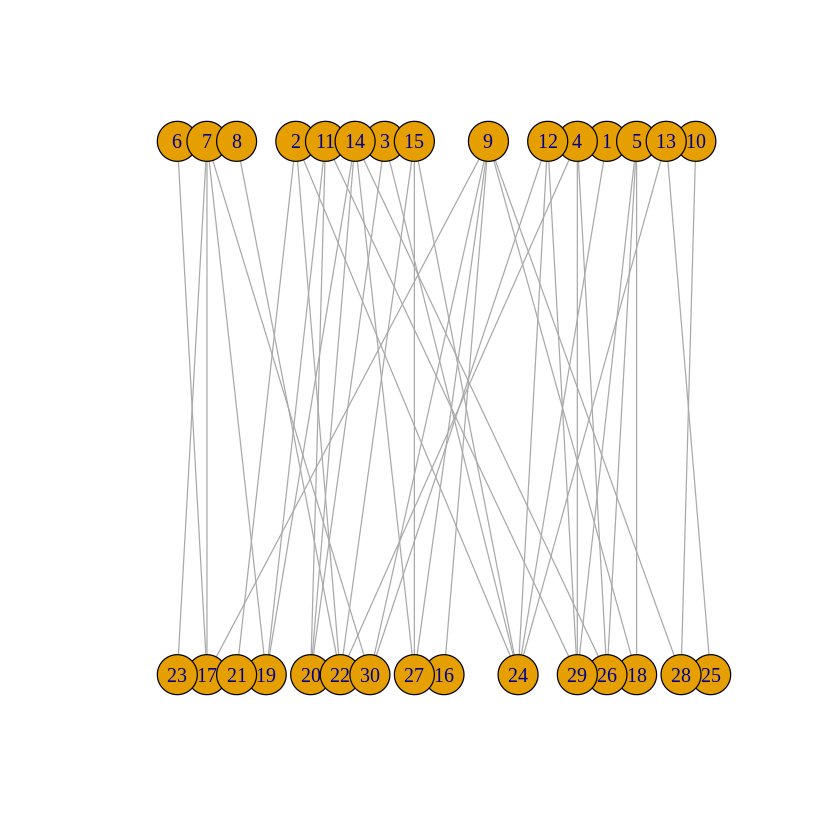

In [ ]:
ceo_graph <- graph.incidence(data, mode = "all")
plot(ceo_graph, edge.arrow.size = 1, layout=layout_as_bipartite)

7. Cеть аффилированности была представлена в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Полученные сети были представлены в виде ценностных матриц и взвешенных графов. Сделаны выводы.

3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


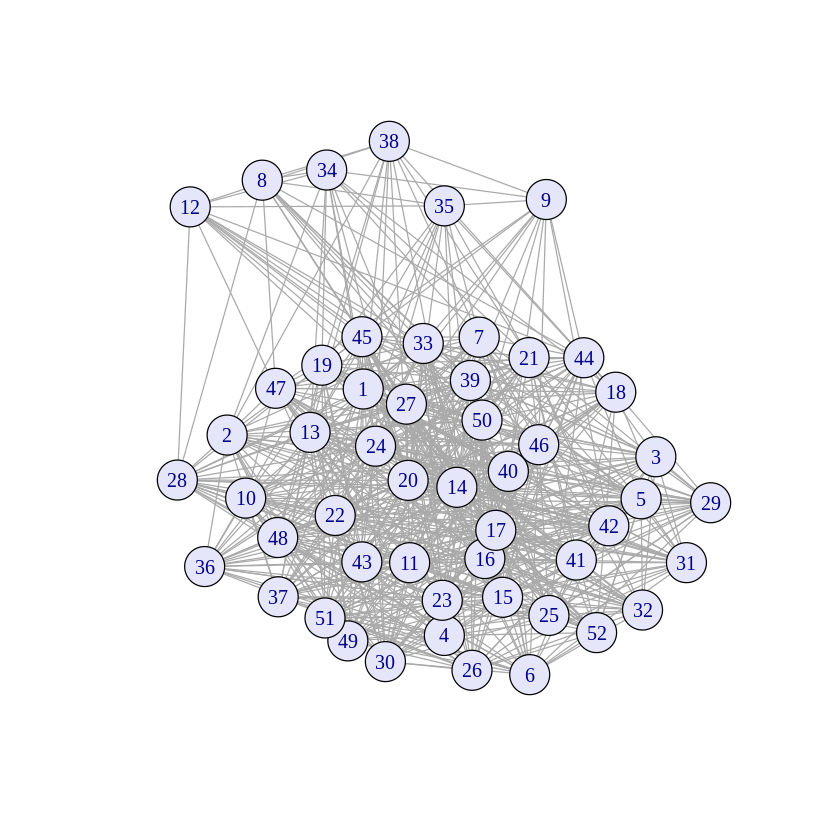

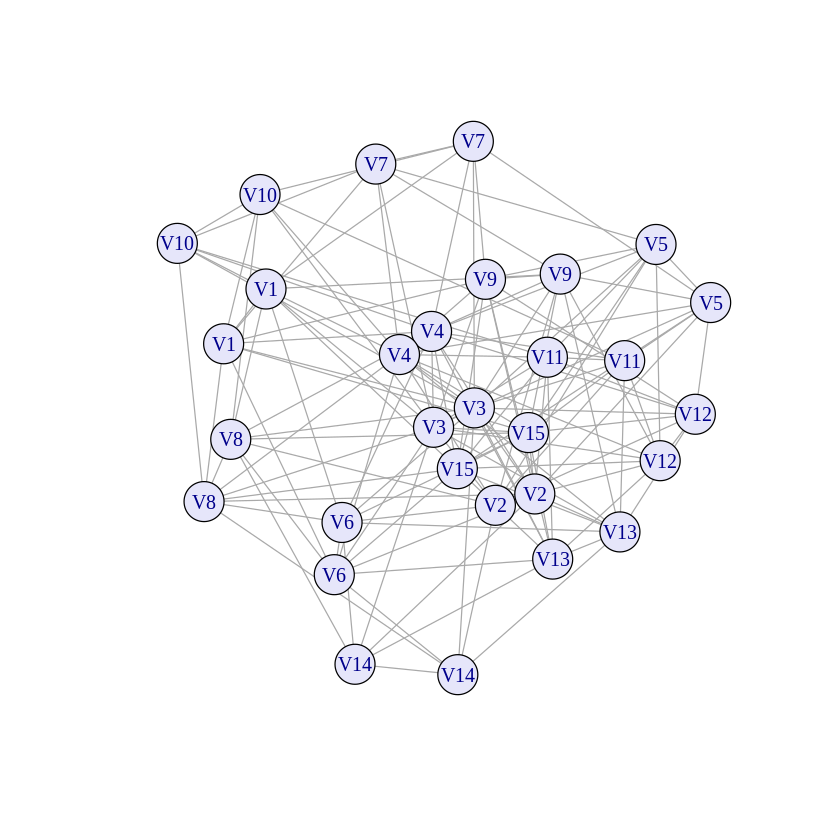

In [ ]:
co.membership.matrix <- data %*% t(data)
co.membership.network = graph.incidence(co.membership.matrix, mode='in',weighted=TRUE)

event.overlap.matrix <- t(data) %*% data
event.overlap.network = graph.incidence(event.overlap.matrix, mode='in', weighted=TRUE)

co.membership.matrix
V(co.membership.network)$color <- "lavender"
plot(co.membership.network, layout=layout_with_fr)

event.overlap.matrix
V(event.overlap.network)$color <- "lavender"
plot(event.overlap.network, layout=layout_with_fr)

Из полыченных данных можно сделать вывод, что каждый участник пристуствует на одном и том же событии как минимум с 3 другими участниками. 

8. Была вычислена степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделаны выводы.

In [ ]:
rates_of_participation <- co.membership.matrix[row(co.membership.matrix)==col(co.membership.matrix)]
for(i in 1:length(rates_of_participation)){
    cat("Актор номер", i, "учавствует в ", rates_of_participation[i], "событиях\n")
}

mean_amount<-sum(rates_of_participation)/length(rates_of_participation)
cat ("Среднее количество событий:", mean_amount)

Актор номер 1 учавствует в  3 событиях
Актор номер 2 учавствует в  3 событиях
Актор номер 3 учавствует в  2 событиях
Актор номер 4 учавствует в  3 событиях
Актор номер 5 учавствует в  3 событиях
Актор номер 6 учавствует в  3 событиях
Актор номер 7 учавствует в  4 событиях
Актор номер 8 учавствует в  3 событиях
Актор номер 9 учавствует в  4 событиях
Актор номер 10 учавствует в  2 событиях
Актор номер 11 учавствует в  3 событиях
Актор номер 12 учавствует в  2 событиях
Актор номер 13 учавствует в  4 событиях
Актор номер 14 учавствует в  7 событиях
Актор номер 15 учавствует в  5 событиях
Актор номер 16 учавствует в  5 событиях
Актор номер 17 учавствует в  6 событиях
Актор номер 18 учавствует в  5 событиях
Актор номер 19 учавствует в  5 событиях
Актор номер 20 учавствует в  5 событиях
Актор номер 21 учавствует в  3 событиях
Актор номер 22 учавствует в  3 событиях
Актор номер 23 учавствует в  4 событиях
Актор номер 24 учавствует в  5 событиях
Актор номер 25 учавствует в  3 событиях
Актор ном

Был сделан вывод, что каждый актор присутствовал как минимум на 3 событиях, а среднее количество событий примерно равно 4.

9. Был вычислен размер и средний размер для каждого события. Сделаны выводы.

In [ ]:
size <- event.overlap.matrix[row(event.overlap.matrix) == col(event.overlap.matrix)]
for(i in 1:length(size)){
    cat("Событие", i, "имеет размер", size[i], "\n")
}

mean_size <- sum(size)/length(size)
cat("Средний размер:", mean_size)

Событие 1 имеет размер 3 
Событие 2 имеет размер 11 
Событие 3 имеет размер 22 
Событие 4 имеет размер 12 
Событие 5 имеет размер 3 
Событие 6 имеет размер 4 
Событие 7 имеет размер 4 
Событие 8 имеет размер 4 
Событие 9 имеет размер 6 
Событие 10 имеет размер 3 
Событие 11 имеет размер 4 
Событие 12 имеет размер 5 
Событие 13 имеет размер 5 
Событие 14 имеет размер 3 
Событие 15 имеет размер 9 
Средний размер: 6.533333

По данным результатам можно сделать вывод, что на каждом событии присутствовало как минимум 3 участника, максимум - 22, в среднем - 6. 

10. Была вычислена плотность для соотношения соучастия и отношения перекрытия. Проинтерпретированы полученные значения.


In [ ]:
dens_participation<-sum(co.membership.matrix) / (length(rates_of_participation) * (length(rates_of_participation) - 1))
cat("Плотность для соотношения соучастия:", dens_participation, '\n')

dens_event <- sum(event.overlap.matrix) / (length(size) * (length(size) - 1))
cat("Плотность для соотношения перекрытия:", dens_event, '\n')

Плотность для соотношения соучастия: 1.563077 
Плотность для соотношения перекрытия: 1.952381 


По имеющимся данным был сделан вывод, что плотность перекрытия невелика.

 11. Опреден диаметр сети аффилированности.

In [47]:
diameter(ceo_graph)

[1] 7

12. Были определены клики уровня 𝑐 = {4,3} для отношения соучастия и клики уровня 𝑐 = {6,5,4,3,2} для отношения перекрытия событий. Сделаны выводы.

In [48]:
graph.co <- co.membership.network
graph.3 <- delete.edges(graph.co, E(graph.co)[E(graph.co)$weight < 4])
max_cliques(graph.3, min=3) 
graph.3 <- delete.edges(graph.co, E(graph.co)[E(graph.co)$weight < 3])
max_cliques(graph.3, min=3) 

graph.event <- event.overlap.network
graph.4 <- delete.edges(graph.event, E(graph.event)[E(graph.event)$weight < 6])
max_cliques(graph.4, min=3) 
graph.4 <- delete.edges(graph.event, E(graph.event)[E(graph.event)$weight < 5])
max_cliques(graph.4, min=3) 
graph.4 <- delete.edges(graph.event, E(graph.event)[E(graph.event)$weight < 4])
max_cliques(graph.4, min=3)
graph.4 <- delete.edges(graph.event, E(graph.event)[E(graph.event)$weight < 3])
max_cliques(graph.4, min=3) 
graph.4 <- delete.edges(graph.event, E(graph.event)[E(graph.event)$weight < 2])
max_cliques(graph.4, min=3) 

list()

list()

list()

list()

list()

list()

list()

Так как клик не существует, это говорит о том, что таких групп участников не существует.

13. Для каждых пар событий были определеня отношения шансов. Сделаны выводы.

In [54]:
kl <- t(data) %*% data
not_kl <- (1-t(data))%*%(1-data)
notk_l <- (1-t(data))%*%data
k_not_l <- t(data)%*%(1-data)
for(i in 2:nrow(kl)){
   for(j in 1:(i-1)){
     cat(paste("Tetta(",i,", ",j,") = ", (kl[i,j]*not_kl[i,j])/(notk_l[i,j]*k_not_l[i,j]),sep=" "), "\n")
   }
}


Tetta( 2 ,  1 ) =  0 
Tetta( 3 ,  1 ) =  0.3 
Tetta( 3 ,  2 ) =  Inf 
Tetta( 4 ,  1 ) =  Inf 
Tetta( 4 ,  2 ) =  0.111111111111111 
Tetta( 4 ,  3 ) =  0 
Tetta( 5 ,  1 ) =  0 
Tetta( 5 ,  2 ) =  0.65 
Tetta( 5 ,  3 ) =  Inf 
Tetta( 5 ,  4 ) =  0.545454545454545 
Tetta( 6 ,  1 ) =  3.33333333333333 
Tetta( 6 ,  2 ) =  5.25 
Tetta( 6 ,  3 ) =  Inf 
Tetta( 6 ,  4 ) =  0.333333333333333 
Tetta( 6 ,  5 ) =  0 
Tetta( 7 ,  1 ) =  3.33333333333333 
Tetta( 7 ,  2 ) =  0 
Tetta( 7 ,  3 ) =  0.1 
Tetta( 7 ,  4 ) =  4.33333333333333 
Tetta( 7 ,  5 ) =  3.33333333333333 
Tetta( 7 ,  6 ) =  0 
Tetta( 8 ,  1 ) =  3.33333333333333 
Tetta( 8 ,  2 ) =  0.4 
Tetta( 8 ,  3 ) =  0.473684210526316 
Tetta( 8 ,  4 ) =  1.2 
Tetta( 8 ,  5 ) =  0 
Tetta( 8 ,  6 ) =  2.11111111111111 
Tetta( 8 ,  7 ) =  0 
Tetta( 9 ,  1 ) =  1.8 
Tetta( 9 ,  2 ) =  0.2 
Tetta( 9 ,  3 ) =  0.882352941176471 
Tetta( 9 ,  4 ) =  3 
Tetta( 9 ,  5 ) =  1.8 
Tetta( 9 ,  6 ) =  0 
Tetta( 9 ,  7 ) =  1.13333333333333 
Tetta( 9 ,  8 ) =

На основе полученных результатов можно сделать вывод, что в сети существуют 40 пар событий, где актор не аффилирован с обоими событиями.  

## Выводы

В ходе выполнения практической работы были изучены n-клики, n-кланы, k-плексы, k-ядра, n-клубы, так же сети аффелированости. Были получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.